## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv("/content/ha_1.csv")
data.head()
data = data.dropna()

In [ ]:
data.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [ ]:
X = data[["age", "chol"]]
y = data["diagnosis"]

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [
  ("Logistic_regression", LogisticRegression())]
)

cross_val_score(lr_pipeline_1, X, y, scoring = "roc_auc", cv=5).mean()

0.6349815288434215

In [ ]:
lr_pipeline_1.fit(X, y)
lr_model = lr_pipeline_1.named_steps['Logistic_regression']
coefficients = lr_model.coef_
intercept = lr_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0.04686331 0.00180124]]
Intercept: [-3.24011226]


In [ ]:
logit_p = np.log(.9 / (1 - .9))
(logit_p - intercept - (.04686331 * 55)) / .00180124

array([1587.71445571])

55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [169]:
logit_p = np.log(.5 / (1 - .5))
log55 = (logit_p - intercept - (.04686331 * 55)) / .00180124
log55

1170.611359514137

In [170]:
#when age is 20
log20 = (logit_p - intercept - (.04686331 * 20)) / .00180124
log20

2081.2150825049657

In [171]:
log80 = (logit_p - intercept - (.04686331 * 80)) / .00180124
log80

520.1801288064023

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
ld_pipeline = Pipeline(
  [
  ("linear_disc", LinearDiscriminantAnalysis())]
)

cross_val_score(ld_pipeline, X, y, scoring = "roc_auc", cv=5).mean()

0.6349815288434215

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
ld_model = ld_pipeline.named_steps['linear_disc']
coef = lda.coef_[0]  # Coefficients for the linear decision boundary
intercept = lda.intercept_[0]

print("Coefficients:", coef)
print("Intercept:", intercept)


Coefficients: [0.04655744 0.00178967]
Intercept: -3.2196776604068784


In [ ]:
 #what exactly is this equation grabbing? I understand it is doing-
 #intercept + (Beta 1 * age ) + (Beta 2 * chol) = diagnosis
 # -3.22 + (0.046 * 55) + (0.0018 * x) = 0
 # 3.22 = 2.53 + .0018x


lda55 = (3.2196776604068784 - (0.04655744 * 55))/0.00178967

In [ ]:
lda20 = (3.2196776604068784 - (0.04655744 * 20))/0.00178967

In [ ]:
lda80 = (3.2196776604068784 - (0.04655744 * 80))/0.00178967

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define pipeline
svc_pipeline = Pipeline([
    ("svc", SVC(kernel='linear'))
])

svc_pipeline.fit(X, y)

# Define parameter grid
param_grid = {'svc__C': [0.1, 1, 10, 100]}

# Perform grid search
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

# Get the best model
best_params = grid_search.best_params_

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)



Best Parameters: {'svc__C': 1}
Best AUC Score: 0.6413469735720374


In [ ]:
coef = svc_pipeline.named_steps["svc"].coef_[0]  # Coefficients for the linear decision boundary
intercept = svc_pipeline.named_steps["svc"].intercept_[0]

print("Coefficients:", coef)
print("Intercept:", intercept)

Coefficients: [0.06439772 0.00365896]
Intercept: -4.686034055211244


In [ ]:
svc55 = (4.686034055211244 - (0.06439772 * 55))/0.00365896

It looks like there cholesterol would have to be at about 312.70

In [ ]:
svc80 = (4.686034055211244 - (0.06439772 * 80))/0.00365896

In [ ]:
svc20 = (4.686034055211244 - (0.06439772 * 20))/0.00365896

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [176]:
df_log = []
df_log.append({"Age": 20, "Chol": log20})
df_log.append({"Age": 55, "Chol": log55})
df_log.append({"Age": 80, "Chol": log80})

df_log = pd.DataFrame(df_log)

df_log



,Age,Chol
0,20,2081.215083
1,55,1170.611360
2,80,520.180129


In [173]:
df_lda = []
df_lda.append({"Age": 20, "Chol": lda20})
df_lda.append({"Age": 55, "Chol": lda55})
df_lda.append({"Age": 80, "Chol": lda80})
df_lda = pd.DataFrame(df_lda)

df_lda

,Age,Chol
0,20,1278.743489
1,55,368.234624
2,80,-282.128850


In [175]:
df_svc = []
df_svc.append({"Age": 20, "Chol": svc20})
df_svc.append({"Age": 55, "Chol": svc55})
df_svc.append({"Age": 80, "Chol": svc80})

df_svc = pd.DataFrame(df_svc)
df_svc

,Age,Chol
0,20,928.700957
1,55,312.700728
2,80,-127.299436


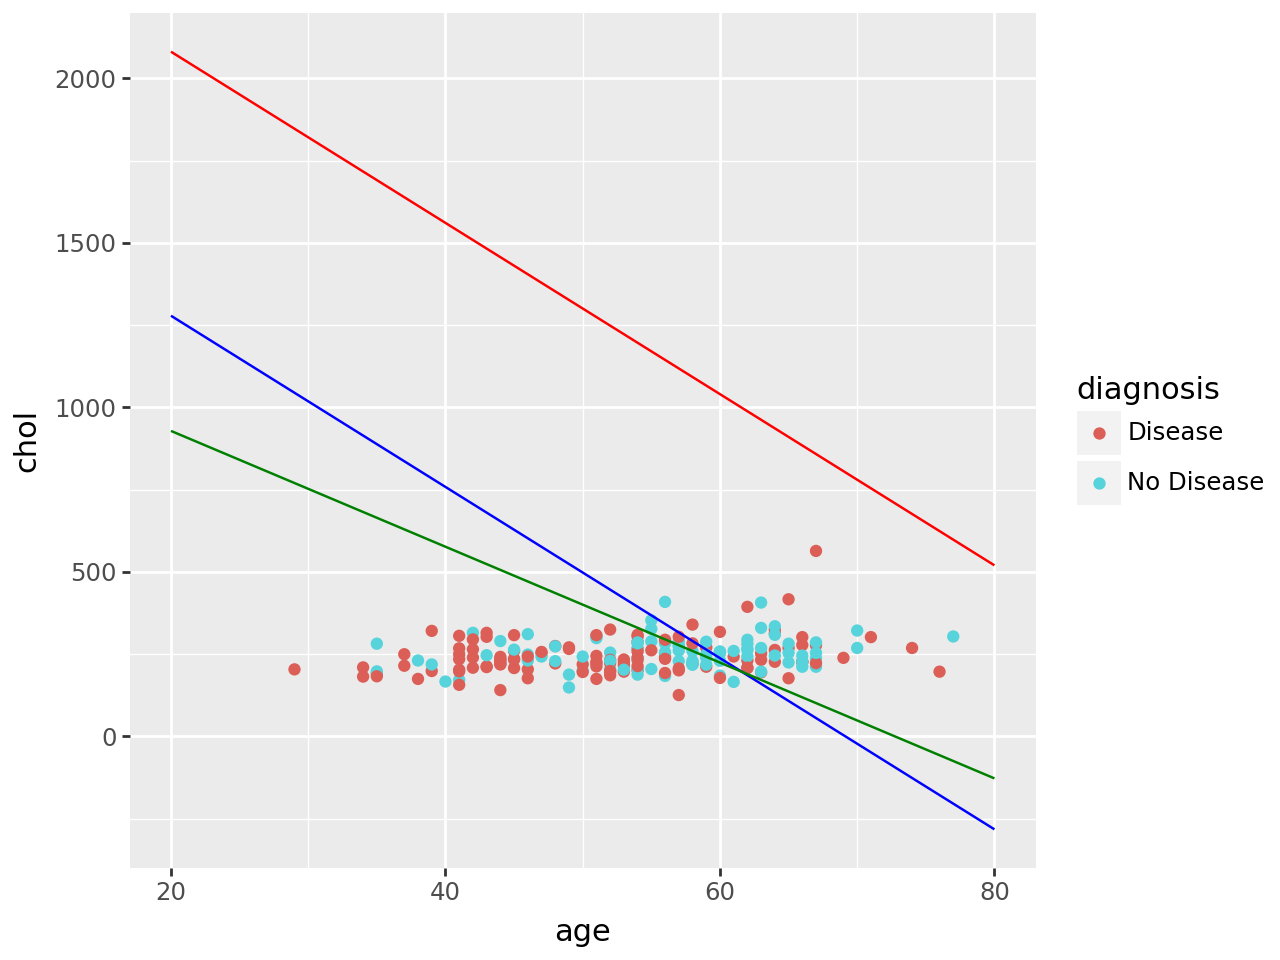

In [177]:
from plotnine import ggplot, aes, geom_point, geom_line
(
    ggplot(data, aes(x="age", y="chol", color="diagnosis"))
    + geom_point()
    + geom_line(aes(x="Age", y="Chol"), data=df_log, color="red")
    + geom_line(aes(x="Age", y="Chol"), data=df_lda, color="blue")
    + geom_line(aes(x="Age", y="Chol"), data=df_svc, color="green")
)

In [ ]:
data.dtypes

,0
Name,object
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
restecg,int64
thalach,int64
diagnosis,object
